In [ ]:
# import pandas as pd
# df=pd.read_excel('countries_hesitancy.xlsx')
# df=df[["Country","Hesitancy_score"]]
# df
#Country wise data analysis
import pandas as pd
df=pd.read_excel('23_countries_data.xlsx')
df=df[["Country","Vaccine_Hesitant", "Male"]]
rowdrops=[]
for x in df.index:
  if((df.loc[x,"Male"] not in [0,1])):
    rowdrops.append(x)
df=df.drop(rowdrops)

In [ ]:
df

,Country,Vaccine_Hesitant,Male
14,India,0.200000,1
15,India,0.100000,1
16,India,0.100000,1
17,India,0.166667,1
18,India,0.233333,1
...,...,...,...
23130,Brazil,0.033333,0
23131,Brazil,0.166667,0
23132,Brazil,0.200000,0
23133,Brazil,0.100000,0


In [ ]:
country_frequency={}
row_drop=set()
for i in df.index:
  if(df.loc[i,"Country"] not in country_frequency):
    country_frequency[df.loc[i,"Country"]]={"Total_Male":0,"Total_Female":0,"VH_Male":0,"VH_Female":0, "Percentage_VH_Female": 0, "Percentage_VH_Male": 0 }
  if(df.loc[i,"Male"]):
    country_frequency[df.loc[i,"Country"]]["Total_Male"]+=1
    country_frequency[df.loc[i,"Country"]]["VH_Male"]+= df.loc[i,"Vaccine_Hesitant"]
  else:
    country_frequency[df.loc[i,"Country"]]["Total_Female"]+=1
    country_frequency[df.loc[i,"Country"]]["VH_Female"]+=df.loc[i,"Vaccine_Hesitant"]

for country in country_frequency:
  if(country_frequency[country]["Total_Male"]>7):
    country_frequency[country]["Percentage_VH_Male"]=country_frequency[country]["VH_Male"]*100/country_frequency[country]["Total_Male"]
  else: 
    row_drop.add(country)
    
for country in country_frequency:
  if(country_frequency[country]["Total_Female"]>7):
    country_frequency[country]["Percentage_VH_Female"]=country_frequency[country]["VH_Female"]*100/country_frequency[country]["Total_Female"]
  else: 
    row_drop.add(country)
print(row_drop)  
for country in row_drop:
    del country_frequency[country]
country_frequency

set()


{'India': {'Total_Male': 576,
  'Total_Female': 514,
  'VH_Male': 40.23333333333339,
  'VH_Female': 47.633333333333475,
  'Percentage_VH_Female': 9.267185473411182,
  'Percentage_VH_Male': 6.984953703703713},
 'Ghana': {'Total_Male': 647,
  'Total_Female': 379,
  'VH_Male': 127.60000000000011,
  'VH_Female': 87.46666666666668,
  'Percentage_VH_Female': 23.078276165347408,
  'Percentage_VH_Male': 19.72179289026277},
 'Kenya': {'Total_Male': 521,
  'Total_Female': 471,
  'VH_Male': 102.19999999999997,
  'VH_Female': 95.5666666666667,
  'Percentage_VH_Female': 20.290162774239214,
  'Percentage_VH_Male': 19.616122840690977},
 'Peru': {'Total_Male': 483,
  'Total_Female': 510,
  'VH_Male': 72.40000000000008,
  'VH_Female': 84.53333333333342,
  'Percentage_VH_Female': 16.575163398692826,
  'Percentage_VH_Male': 14.98964803312631},
 'Turkey': {'Total_Male': 482,
  'Total_Female': 504,
  'VH_Male': 69.56666666666666,
  'VH_Female': 64.30000000000007,
  'Percentage_VH_Female': 12.75793650793652

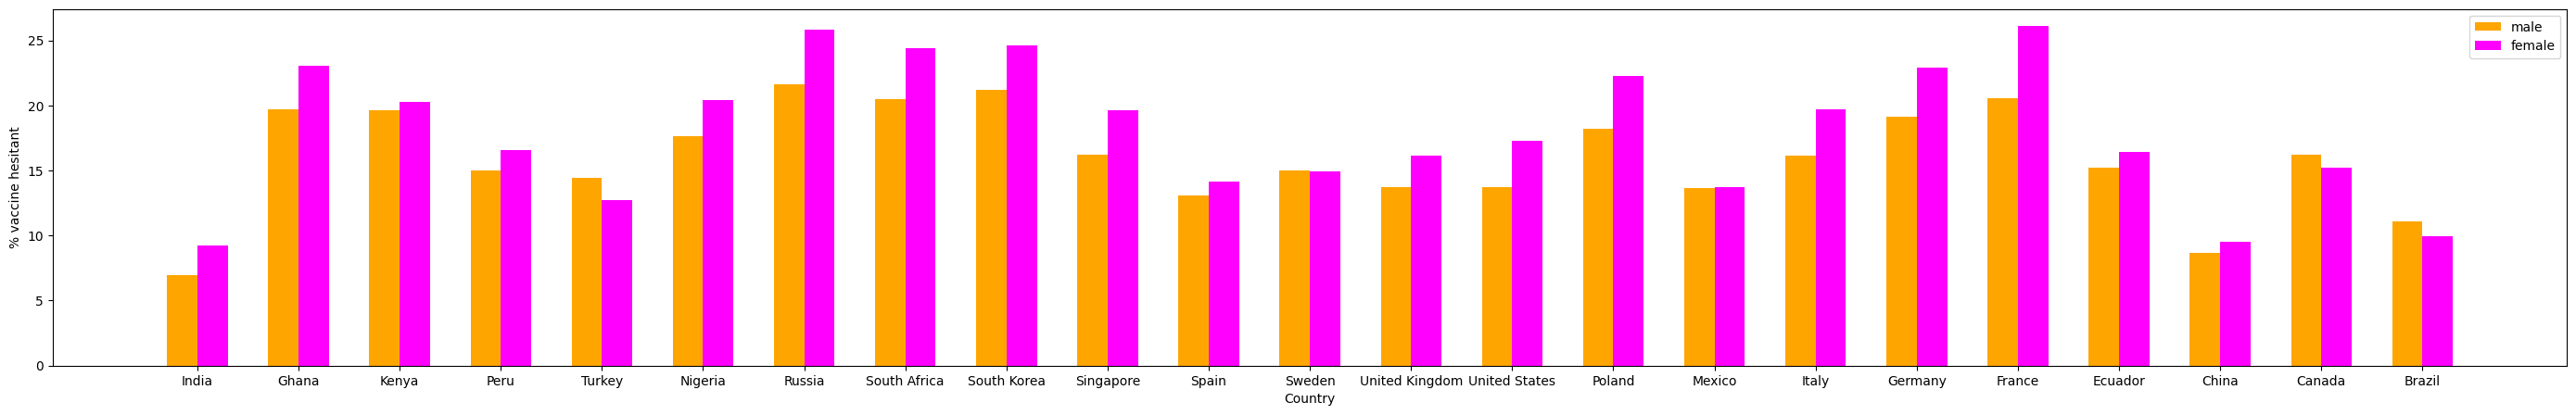

In [62]:
#Country wise analysis
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize = (35, 5))
Percentage_VH_Male_List=[]
Percentage_VH_Female_List=[]
country_list=[]
for country in country_frequency:
  Percentage_VH_Male_List.append(country_frequency[country]["Percentage_VH_Male"])
  Percentage_VH_Female_List.append(country_frequency[country]["Percentage_VH_Female"])
  country_list.append(country)
country_arr=np.arange(len(country_list))
rect1=plt.bar(country_arr-0.15, Percentage_VH_Male_List, width=0.30, color='orange')
rect2=plt.bar(country_arr+0.15, Percentage_VH_Female_List, width=0.30, color='fuchsia')
plt.xticks(country_arr, country_list)
plt.xlabel("Country")
plt.ylabel("% vaccine hesitant")
plt.legend((rect1[0], rect2[0]),("male", "female"))
plt.show()

In [57]:
#Global data analysis
import pandas as pd
df=pd.read_excel('23_countries_data.xlsx')
df=df[["Male","Age","Vaccine_Hesitant"]]
df

,Male,Age,Vaccine_Hesitant
0,2,65,0.100000
1,2,67,0.000000
2,2,67,0.000000
3,2,67,0.033333
4,2,67,0.033333
...,...,...,...
23130,0,55,0.033333
23131,0,52,0.166667
23132,0,56,0.200000
23133,0,55,0.100000


In [58]:
rowdrops=[]
for x in df.index:
  if((df.loc[x,"Male"] not in [0,1]) or (df.loc[x,"Age"] not in range(0,110))):
    rowdrops.append(x)
df=df.drop(rowdrops)

In [59]:
age_frequency={}
row_drop=set()
for i in df.index:
  if(df.loc[i,"Age"] not in age_frequency):
    age_frequency[df.loc[i,"Age"]]={"Total_Male":0,"Total_Female":0,"VH_Male":0,"VH_Female":0, "Percentage_VH_Female": 0, "Percentage_VH_Male": 0 }
  if(df.loc[i,"Male"]):
    age_frequency[df.loc[i,"Age"]]["Total_Male"]+=1
    age_frequency[df.loc[i,"Age"]]["VH_Male"]+= df.loc[i,"Vaccine_Hesitant"]
  else:
    age_frequency[df.loc[i,"Age"]]["Total_Female"]+=1
    age_frequency[df.loc[i,"Age"]]["VH_Female"]+=df.loc[i,"Vaccine_Hesitant"]

for age in age_frequency:
  if(age_frequency[age]["Total_Male"]>7):
    age_frequency[age]["Percentage_VH_Male"]=age_frequency[age]["VH_Male"]*100/age_frequency[age]["Total_Male"]
  else: 
    row_drop.add(age)
    
for age in age_frequency:
  if(age_frequency[age]["Total_Female"]>7):
    age_frequency[age]["Percentage_VH_Female"]=age_frequency[age]["VH_Female"]*100/age_frequency[age]["Total_Female"]
  else: 
    row_drop.add(age)
print(row_drop)  
for age in row_drop:
    del age_frequency[age]
age_frequency

{81, 83, 84, 85, 86, 87, 88, 89}


{20: {'Total_Male': 269,
  'Total_Female': 357,
  'VH_Male': 48.96666666666669,
  'VH_Female': 69.53333333333329,
  'Percentage_VH_Female': 19.477124183006524,
  'Percentage_VH_Male': 18.203221809169772},
 22: {'Total_Male': 321,
  'Total_Female': 367,
  'VH_Male': 54.9000000000001,
  'VH_Female': 69.30000000000008,
  'Percentage_VH_Female': 18.882833787465962,
  'Percentage_VH_Male': 17.10280373831779},
 23: {'Total_Male': 318,
  'Total_Female': 398,
  'VH_Male': 58.53333333333338,
  'VH_Female': 81.63333333333334,
  'Percentage_VH_Female': 20.510887772194305,
  'Percentage_VH_Male': 18.406708595387858},
 26: {'Total_Male': 249,
  'Total_Female': 316,
  'VH_Male': 46.533333333333374,
  'VH_Female': 61.86666666666676,
  'Percentage_VH_Female': 19.57805907172999,
  'Percentage_VH_Male': 18.6880856760375},
 27: {'Total_Male': 242,
  'Total_Female': 265,
  'VH_Male': 46.93333333333332,
  'VH_Female': 51.40000000000001,
  'Percentage_VH_Female': 19.396226415094343,
  'Percentage_VH_Male': 

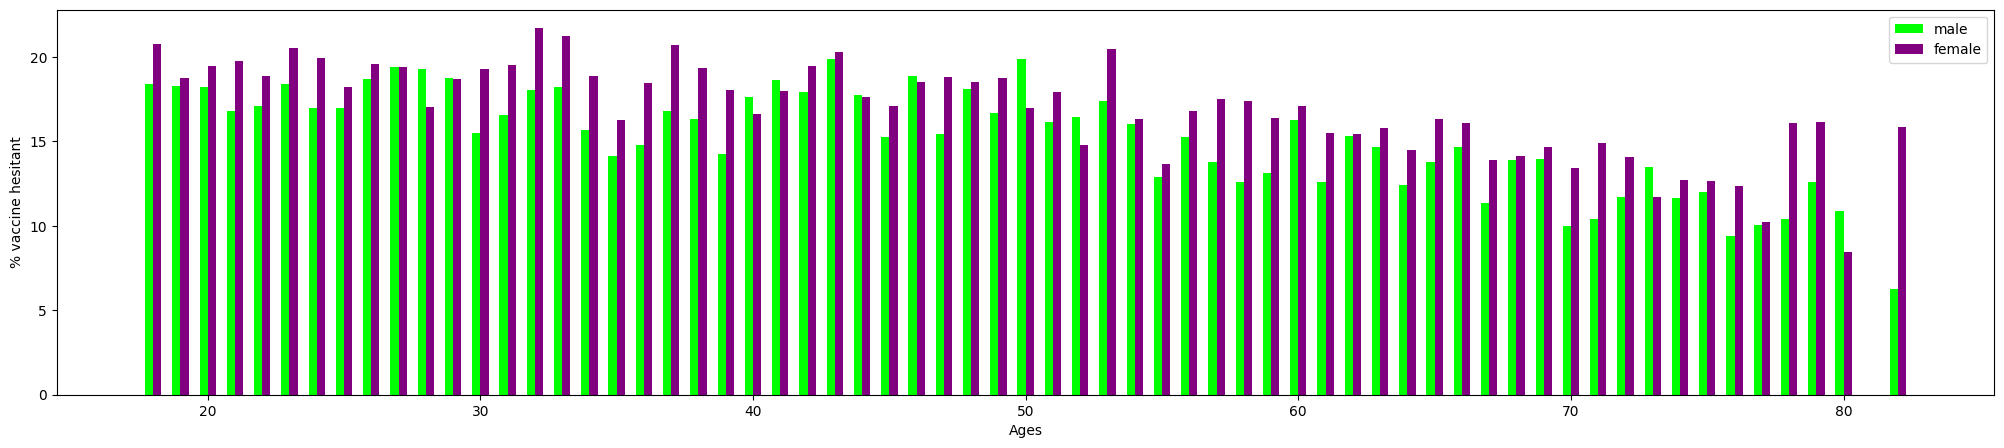

In [60]:
import matplotlib.pyplot as plt
import numpy as np
Percentage_VH_Male_List=[]
Percentage_VH_Female_List=[]
ages=[]
fig = plt.figure(figsize = (25, 5))
for age in age_frequency:
  Percentage_VH_Male_List.append(age_frequency[age]["Percentage_VH_Male"])
  Percentage_VH_Female_List.append(age_frequency[age]["Percentage_VH_Female"])
  ages.append(age)
Percentage_VH_Male=np.array(Percentage_VH_Male_List)
Percentage_VH_Female=np.array(Percentage_VH_Female_List)
ages_arr=np.array(ages)
rect1=plt.bar(ages_arr-0.15, Percentage_VH_Male_List, width=0.30, color='lime')
rect2=plt.bar(ages_arr+0.15, Percentage_VH_Female_List, width=0.30, color='purple')
plt.xlabel("Ages")
plt.ylabel("% vaccine hesitant")
plt.legend((rect1[0], rect2[0]),("male", "female"))
plt.show()

In [ ]:
#Indian data analysis
import pandas as pd
df=pd.read_excel('23_countries_data.xlsx')
df=df[["Country", "Male","Age","Vaccine_Hesitant"]]
df2=df[df["Country"] == 'India', ]
df2

,Country,Male,Age,Vaccine_Hesitant
0,India,2,65,0.100000
1,India,2,67,0.000000
2,India,2,67,0.000000
3,India,2,67,0.033333
4,India,2,67,0.033333
...,...,...,...,...
1102,India,1,40,0.400000
1103,India,0,43,0.466667
1104,India,1,55,0.166667
1105,India,0,45,0.000000


In [ ]:
rowdrops=[]
for x in df2.index:
  if((df2.loc[x,"Male"] not in [0,1]) or (df.loc[x,"Age"] not in range(0,110))):
    rowdrops.append(x)
df2=df2.drop(rowdrops)

In [ ]:
age_frequency={}
row_drop=set()
for i in df2.index:
  if(df2.loc[i,"Age"] not in age_frequency):
    age_frequency[df2.loc[i,"Age"]]={"Total_Male":0,"Total_Female":0,"VH_Male":0,"VH_Female":0, "Percentage_VH_Female": 0, "Percentage_VH_Male": 0 }
  if(df2.loc[i,"Male"]):
    age_frequency[df2.loc[i,"Age"]]["Total_Male"]+=1
    age_frequency[df2.loc[i,"Age"]]["VH_Male"]+= df2.loc[i,"Vaccine_Hesitant"]
  else:
    age_frequency[df2.loc[i,"Age"]]["Total_Female"]+=1
    age_frequency[df2.loc[i,"Age"]]["VH_Female"]+=df2.loc[i,"Vaccine_Hesitant"]

for age in age_frequency:
  if(age_frequency[age]["Total_Male"]>7):
    age_frequency[age]["Percentage_VH_Male"]=age_frequency[age]["VH_Male"]*100/age_frequency[age]["Total_Male"]
  else: 
    row_drop.add(age)
    
for age in age_frequency:
  if(age_frequency[age]["Total_Female"]>7):
    age_frequency[age]["Percentage_VH_Female"]=age_frequency[age]["VH_Female"]*100/age_frequency[age]["Total_Female"]
  else: 
    row_drop.add(age)
print(row_drop)  
for age in row_drop:
    del age_frequency[age]
age_frequency

{24, 26, 27, 28, 29, 31, 32, 33, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 73, 74, 77, 78}


{20: {'Total_Male': 20,
  'Total_Female': 19,
  'VH_Male': 3.3666666666666663,
  'VH_Female': 2.3,
  'Percentage_VH_Female': 12.105263157894735,
  'Percentage_VH_Male': 16.833333333333332},
 22: {'Total_Male': 32,
  'Total_Female': 17,
  'VH_Male': 3.499999999999999,
  'VH_Female': 1.4999999999999996,
  'Percentage_VH_Female': 8.823529411764703,
  'Percentage_VH_Male': 10.937499999999996},
 23: {'Total_Male': 8,
  'Total_Female': 18,
  'VH_Male': 0.4999999999999999,
  'VH_Female': 2.366666666666666,
  'Percentage_VH_Female': 13.148148148148143,
  'Percentage_VH_Male': 6.249999999999998},
 19: {'Total_Male': 14,
  'Total_Female': 15,
  'VH_Male': 2.3,
  'VH_Female': 2.0666666666666664,
  'Percentage_VH_Female': 13.777777777777775,
  'Percentage_VH_Male': 16.428571428571427},
 21: {'Total_Male': 31,
  'Total_Female': 35,
  'VH_Male': 2.933333333333333,
  'VH_Female': 3.4666666666666663,
  'Percentage_VH_Female': 9.904761904761903,
  'Percentage_VH_Male': 9.462365591397848},
 25: {'Total_

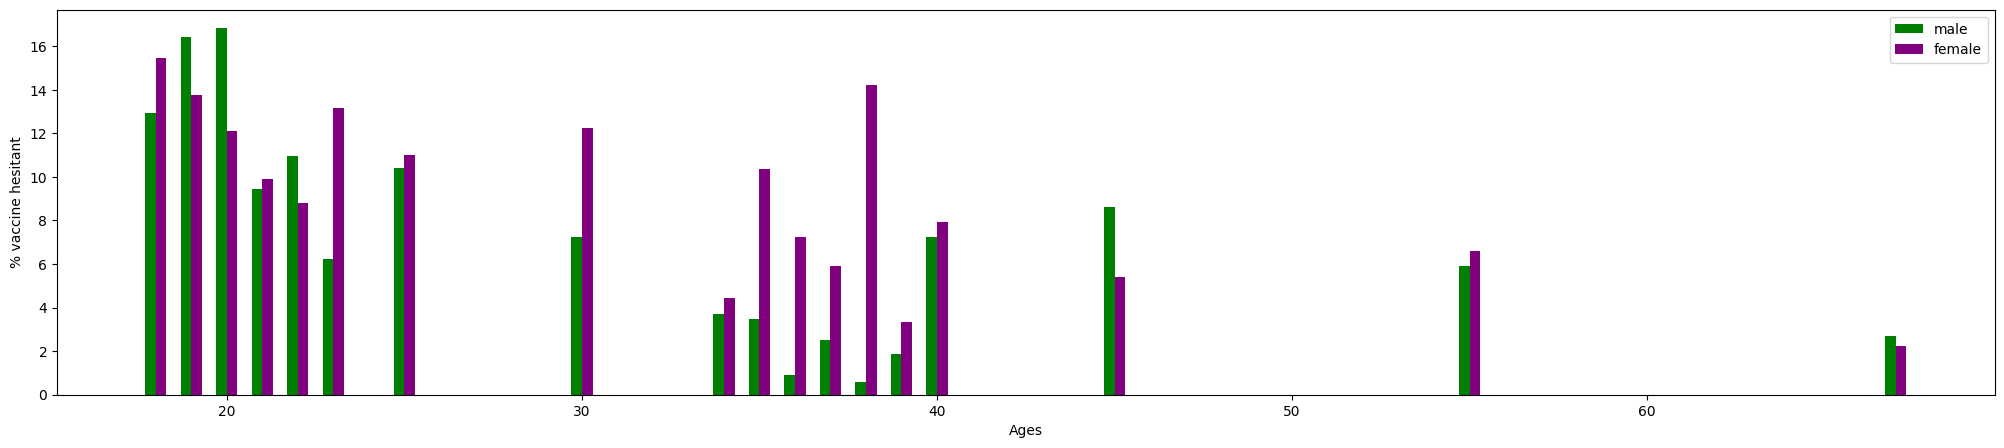

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
Percentage_VH_Male_List=[]
Percentage_VH_Female_List=[]
ages=[]
fig = plt.figure(figsize = (25, 5))
for age in age_frequency:
  Percentage_VH_Male_List.append(age_frequency[age]["Percentage_VH_Male"])
  Percentage_VH_Female_List.append(age_frequency[age]["Percentage_VH_Female"])
  ages.append(age)
Percentage_VH_Male=np.array(Percentage_VH_Male_List)
Percentage_VH_Female=np.array(Percentage_VH_Female_List)
ages_arr=np.array(ages)
rect1=plt.bar(ages_arr-0.15, Percentage_VH_Male_List, width=0.30, color='green')
rect2=plt.bar(ages_arr+0.15, Percentage_VH_Female_List, width=0.30, color='purple')
plt.xlabel("Ages")
plt.ylabel("% vaccine hesitant")
plt.legend((rect1[0], rect2[0]),("male", "female"))
plt.show()